In [2]:
%matplotlib inline
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import time
import matplotlib.dates as md
from scipy import fftpack

# Second Based Dataset

In [3]:
df_nov20_1s = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/nov20_data/seb_1s_class_t_nov20.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_nov20_1s['Timestamp'] = pd.to_datetime(df_nov20_1s['Timestamp'],unit='s')
df_nov20_1s[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp,Label
0,0.000295,0.001028,0.000767,2017-11-20 00:12:33,0
1,0.000193,0.000861,0.000821,2017-11-20 00:12:34,0
2,0.000256,0.000913,0.000788,2017-11-20 00:12:35,0
3,0.000203,0.000893,0.000811,2017-11-20 00:12:36,0
4,0.000201,0.000815,0.000733,2017-11-20 00:12:37,0


In [4]:
df_nov20_1s.shape

(86400, 5)

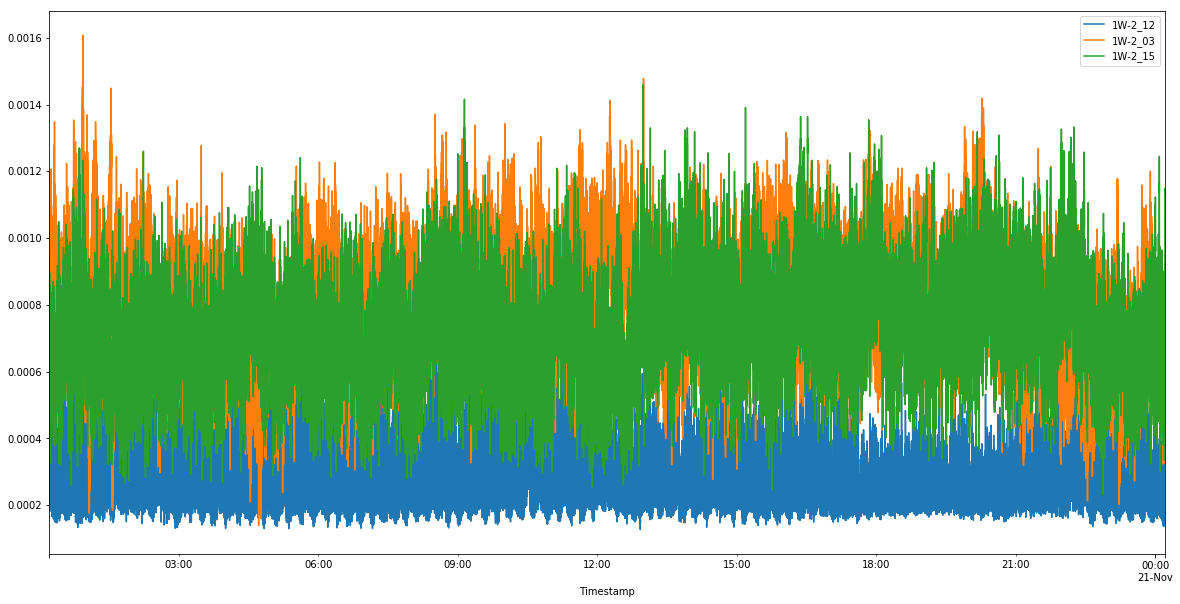

In [5]:
df_nov20_1s.plot(x='Timestamp',  y = ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Minute Based Dataset

In [6]:
df_nov20_1m = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/nov20_data/seb_1min_class_t_nov20.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_nov20_1m['Timestamp'] = pd.to_datetime(df_nov20_1m['Timestamp'],unit='s')

In [7]:
# select Nov.20 data
df_nov20_1m[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp,Label
0,0.000280,0.000908,0.000729,2017-11-20 00:12:33,0
1,0.000325,0.000931,0.000588,2017-11-20 00:13:33,0
2,0.000384,0.000909,0.000681,2017-11-20 00:14:33,0
3,0.000312,0.000827,0.000602,2017-11-20 00:15:33,0
4,0.000315,0.000821,0.000559,2017-11-20 00:16:33,0


In [8]:
df_nov20_1m.shape

(1440, 5)

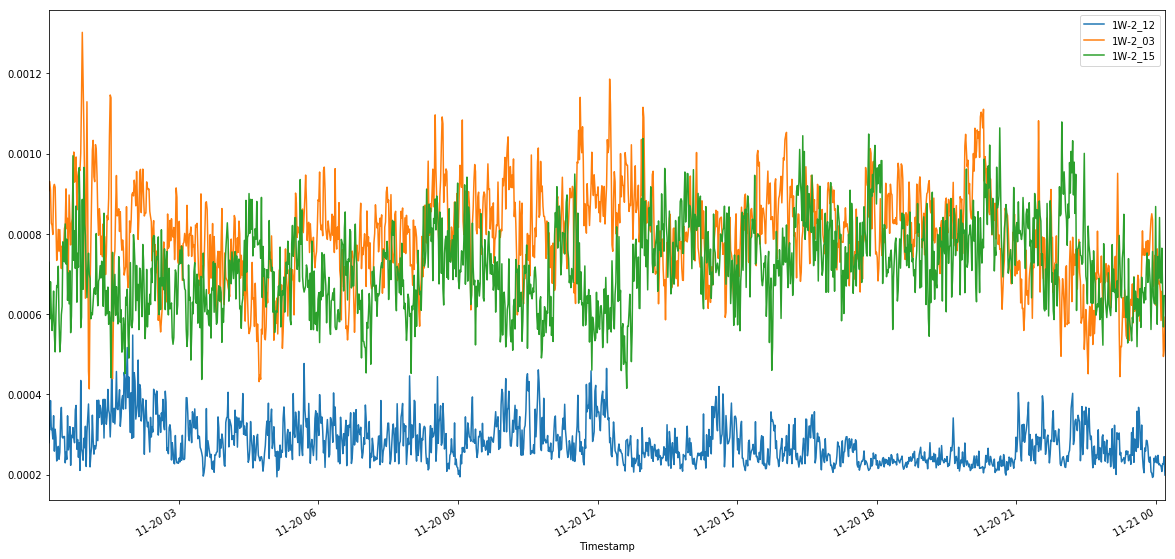

In [9]:
df_nov20_1m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Second Based Baseline Dataset

In [10]:
df_base_1s = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/baseline-data/seb_1s_baseline.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_base_1s['Timestamp'] = pd.to_datetime(df_base_1s['Timestamp'],unit='s')

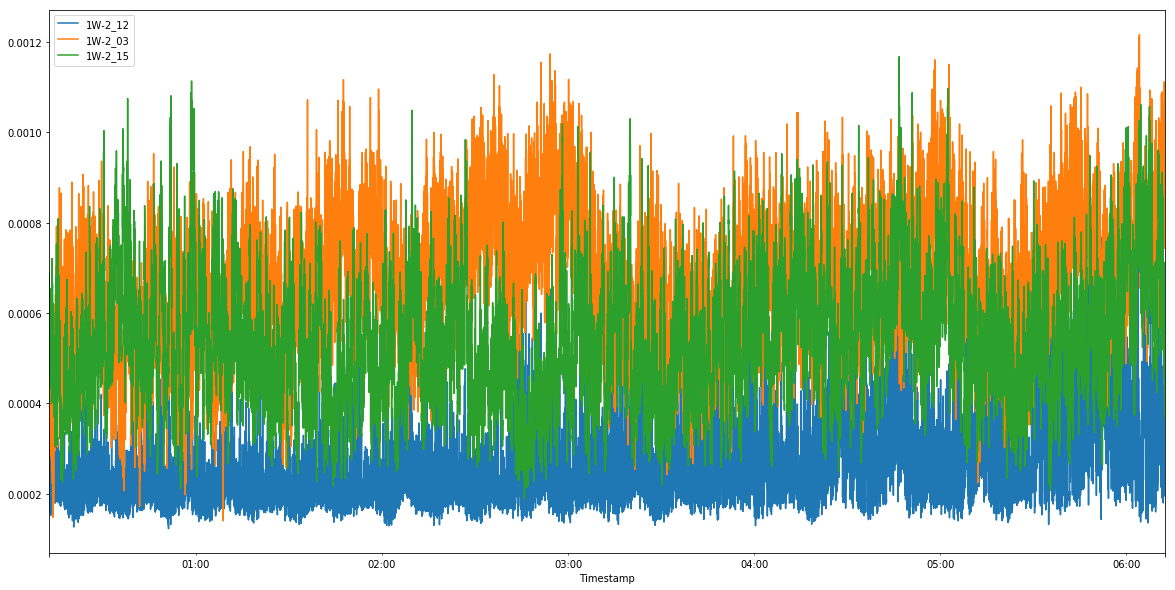

In [11]:
df_base_1s.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Average to 5 min and 10 min

In [30]:
df_base_1s.iloc[0][2]

0.00051287608221173286

In [46]:
def avg_from_avg1min(d_1min,time_scale):
    d_5min = []
    for i in range(0,int(1440/time_scale)):
        ch1_avg = 0
        ch2_avg = 0
        ch3_avg = 0
        for j in range(0,time_scale):
            ch1_avg += d_1min.iloc[i*time_scale+j][0]
            ch2_avg += d_1min.iloc[i*time_scale+j][1]
            ch3_avg += d_1min.iloc[i*time_scale+j][2]
        d_5min.append([ch1_avg,ch2_avg,ch3_avg,d_1min.iloc[i*time_scale][3]])
    return pd.DataFrame(d_5min, columns=['1W-2_12','1W-2_03','1W-2_15','Timestamp'])

df_nov20_5m = avg_from_avg1min(df_nov20_1m, 5)

In [47]:
df_nov20_5m.shape

(288, 4)

In [48]:
df_nov20_5m[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp
0,0.001616,0.004395,0.003159,2017-11-20 00:12:33
1,0.001500,0.004381,0.002903,2017-11-20 00:17:33
2,0.001241,0.003872,0.003148,2017-11-20 00:22:33
3,0.001581,0.003771,0.003280,2017-11-20 00:27:33
4,0.001364,0.004199,0.003702,2017-11-20 00:32:33


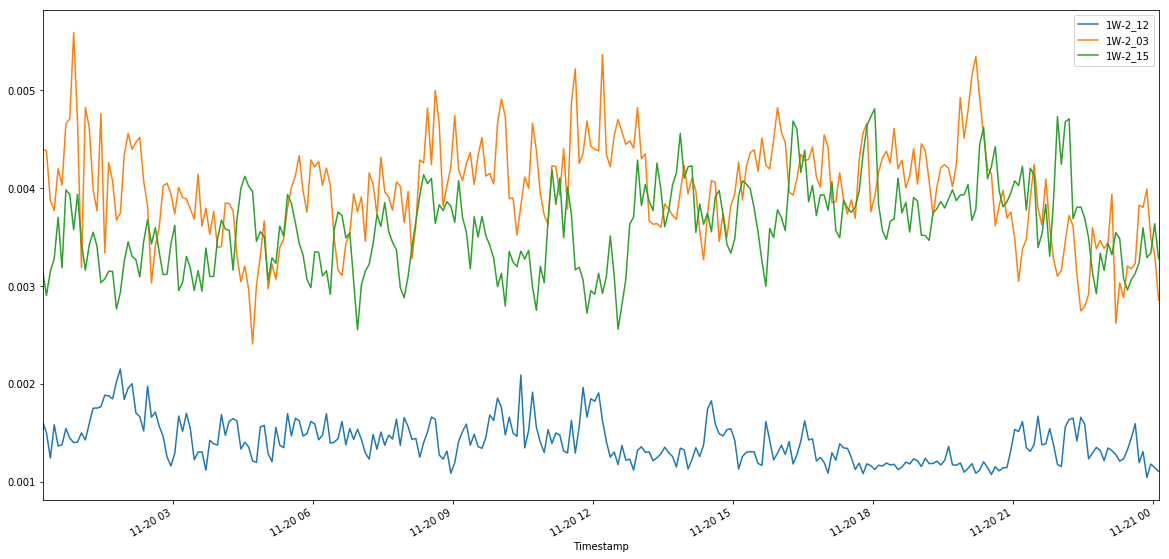

In [49]:
df_nov20_5m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

In [53]:
df_nov20_10m = avg_from_avg1min(df_nov20_1m, 10)
df_nov20_10m.shape

(144, 4)

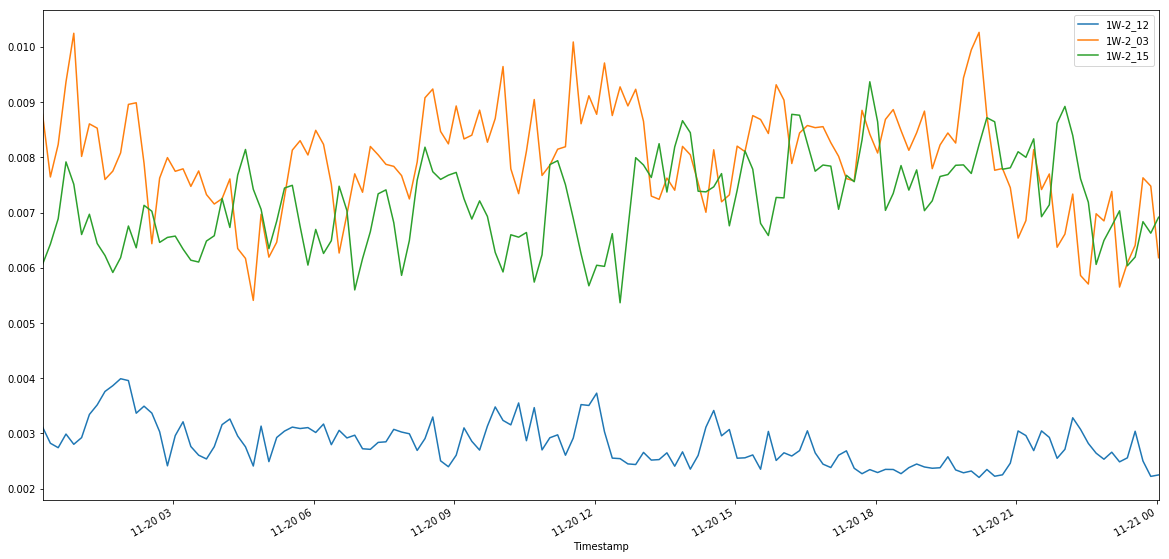

In [54]:
df_nov20_10m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Minute Based Baseline Dataset

In [26]:
df_base_1m = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/baseline-data/seb_1min_baseline.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_base_1m['Timestamp'] = pd.to_datetime(df_base_1m['Timestamp'],unit='s')
df_base_1m[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp,Label
0,0.000220,0.000433,0.000555,2017-11-23 00:12:33,0
1,0.000231,0.000382,0.000501,2017-11-23 00:13:33,0
2,0.000231,0.000540,0.000511,2017-11-23 00:14:33,0
3,0.000216,0.000609,0.000460,2017-11-23 00:15:33,0
4,0.000233,0.000526,0.000352,2017-11-23 00:16:33,0


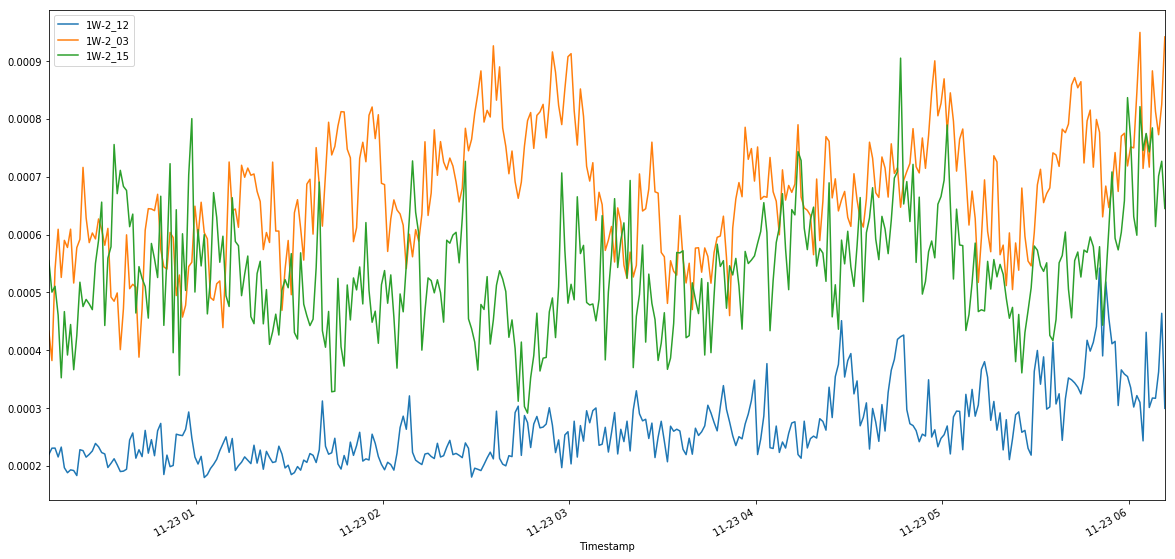

In [13]:
df_base_1m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Anomaly Detection

### Reference: http://amid.fish/anomaly-detection-with-k-means-clustering

In [60]:
from sklearn.cluster import KMeans
import learn_utils

In [114]:
def plot_waves(waves, step):
    """
    Plot a set of 9 waves from the given set, starting from the first one
    and increasing in index by 'step' for each subsequent graph
    """
    plt.figure()
    n_graph_rows = 3
    n_graph_cols = 3
    graph_n = 1
    wave_n = 0
    for _ in range(n_graph_rows):
        for _ in range(n_graph_cols):
            axes = plt.subplot(n_graph_rows, n_graph_cols, graph_n)
            axes.set_ylim([-0.0006, 0.0006])
            plt.plot(waves[wave_n])
            graph_n += 1
            wave_n += step
    # fix subplot sizes so that everything fits
    plt.tight_layout()
    plt.show()

## Windowing Data

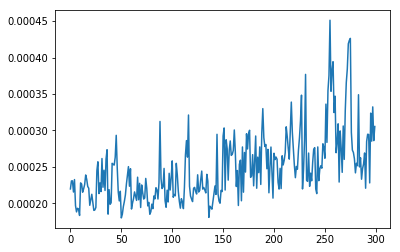

In [302]:
segment_len = 32
slide_len = 2
segments = []
df = df_base_1m['1W-2_12']
df.shape
df[0:5]
plt.plot(df[0:300])

In [303]:
df.shape

(360,)

In [226]:
for start_pos in range(0, len(df), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(df[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))

Produced 165 waveform segments


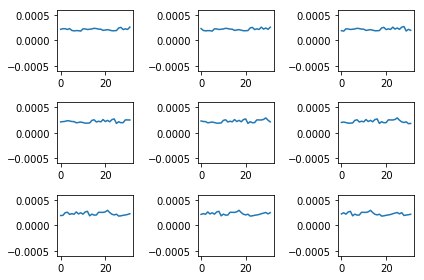

In [227]:
plot_waves(segments, step=2)

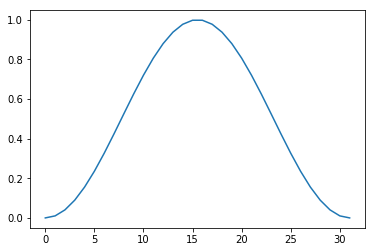

In [228]:
window_rads = np.linspace(0, np.pi, segment_len)
window = np.sin(window_rads)**2
plt.plot(window)
plt.show()

In [229]:
windowed_segments = []
for segment in segments:
    windowed_segment = np.copy(segment) * window
    windowed_segments.append(windowed_segment)

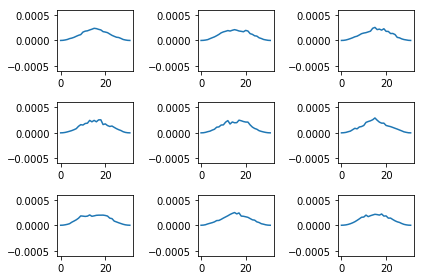

In [230]:
plot_waves(windowed_segments, step=3)

## Clustering

In [231]:
clusterer = KMeans(n_clusters=150)
clusterer.fit(windowed_segments)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=150, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

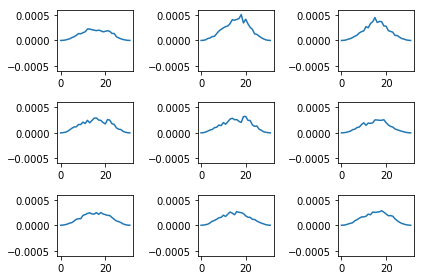

In [232]:
plot_waves(clusterer.cluster_centers_, step=15)

## Reconstruction

In [233]:
slide_len = int(segment_len/2)
test_segments = learn_utils.sliding_chunker(
    df,
    window_len=segment_len,
    slide_len=slide_len
)

[test_segments[0]]

[array([ 0.00021973,  0.00023071,  0.00023084,  0.00021551,  0.00023258,
         0.00019688,  0.00018824,  0.00019322,  0.00019204,  0.00018336,
         0.00022805,  0.00022645,  0.00021522,  0.00021997,  0.0002259 ,
         0.00023891,  0.00023303,  0.00022313,  0.00022073,  0.0001973 ,
         0.00020448,  0.00021242,  0.00020191,  0.00019032,  0.00019099,
         0.00019433,  0.00024478,  0.00025697,  0.00021339,  0.00022797,
         0.00021608,  0.00026146])]

In [234]:
centroids = clusterer.cluster_centers_
segment = np.copy(test_segments[0])

# remember, the clustering was set up using the windowed data
# so to find a match, we should also window our search key
windowed_segment = segment * window
windowed_segment

array([  0.00000000e+00,   2.36129853e-06,   9.35386638e-06,
         1.93132345e-05,   3.61701209e-05,   4.63680508e-05,
         6.14324877e-05,   8.19825919e-05,   1.00884669e-04,
         1.14661432e-04,   1.64239909e-04,   1.82529521e-04,
         1.89256330e-04,   2.06154604e-04,   2.20716179e-04,
         2.38298157e-04,   2.32432509e-04,   2.18016932e-04,
         2.06859713e-04,   1.73498523e-04,   1.64824547e-04,
         1.52981085e-04,   1.26261214e-04,   9.99784309e-05,
         8.10338743e-05,   6.34180075e-05,   5.76504049e-05,
         3.99636196e-05,   1.91238649e-05,   9.23745285e-06,
         2.21163303e-06,   3.92121030e-36])

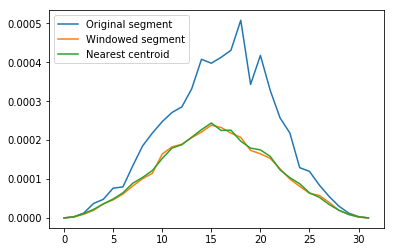

In [294]:
# predict() returns a list of centres to cope with the possibility of multiple
# samples being passed
nearest_centroid_idx = clusterer.predict([windowed_segment])[0]
nearest_centroid = np.copy(centroids[nearest_centroid_idx])
plt.figure()
plt.plot(segment, label="Original segment")
plt.plot(windowed_segment, label="Windowed segment")
plt.plot(nearest_centroid, label="Nearest centroid")
plt.legend()
plt.show()

Maximum reconstruction error was 0.000018
98th percentile of reconstruction error was -0.000000


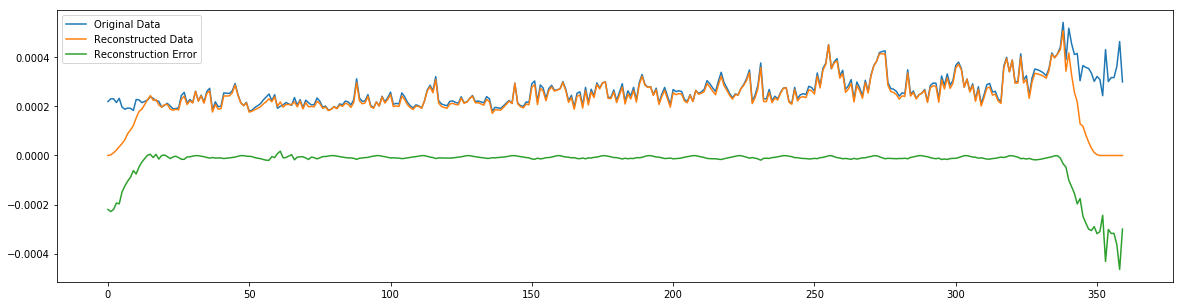

In [310]:
reconstruction = np.zeros(len(df))
slide_len = int(segment_len/2)

for segment_n, segment in enumerate(test_segments):
    # don't modify the data in segments
    segment = np.copy(segment)
    segment *= window
    nearest_centroid_idx = clusterer.predict([segment])[0]
    centroids = clusterer.cluster_centers_
    nearest_centroid = np.copy(centroids[nearest_centroid_idx])
    
    # overlay our reconstructed segments with an overlap of half a segment
    pos = segment_n * slide_len
    reconstruction[pos:pos+segment_len] += nearest_centroid

n_plot_samples = 360

error = reconstruction[0:n_plot_samples] - df[0:n_plot_samples]
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %f" % error.max())
print("98th percentile of reconstruction error was %f" % error_98th_percentile)
plt.figure(figsize=(20, 5))
plt.plot(df[0:n_plot_samples], label="Original Data")
plt.plot(reconstruction[0:n_plot_samples], label="Reconstructed Data")
plt.plot(error[0:n_plot_samples], label="Reconstruction Error")
plt.legend()
plt.show()

# Anomaly Detection

In [311]:
def sliding_chunker(data, window_len, slide_len):
    """
    Split a list into a series of sub-lists, each sub-list window_len long,
    sliding along by slide_len each time. If the list doesn't have enough
    elements for the final sub-list to be window_len long, the remaining data
    will be dropped.

    e.g. sliding_chunker(range(6), window_len=3, slide_len=2)
    gives [ [0, 1, 2], [2, 3, 4] ]
    """
    chunks = []
    for pos in range(0, len(data), slide_len):
        chunk = np.copy(data[pos:pos+window_len])
        if len(chunk) != window_len:
            continue
        chunks.append(chunk)

    return chunks

def reconstruct(data, window, clusterer):
    """
    Reconstruct the given data using the cluster centers from the given
    clusterer.
    """
    window_len = len(window)
    slide_len = int(window_len/2)
    segments = sliding_chunker(data, window_len, slide_len)
    reconstructed_data = np.zeros(len(data))
    for segment_n, segment in enumerate(segments):
        # window the segment so that we can find it in our clusters which were
        # formed from windowed data
        segment *= window
        nearest_match_idx = clusterer.predict([segment])[0]
        nearest_match = np.copy(clusterer.cluster_centers_[nearest_match_idx])

        pos = segment_n * slide_len
        reconstructed_data[pos:pos+window_len] += nearest_match

    return reconstructed_data


In [312]:
df_anomalous = np.copy(df_nov20_1m["1W-2_12"])
#df_anomalous[210:215] = 0

Maximum reconstruction error was 0.000237
98th percentile of reconstruction error was 0.000149


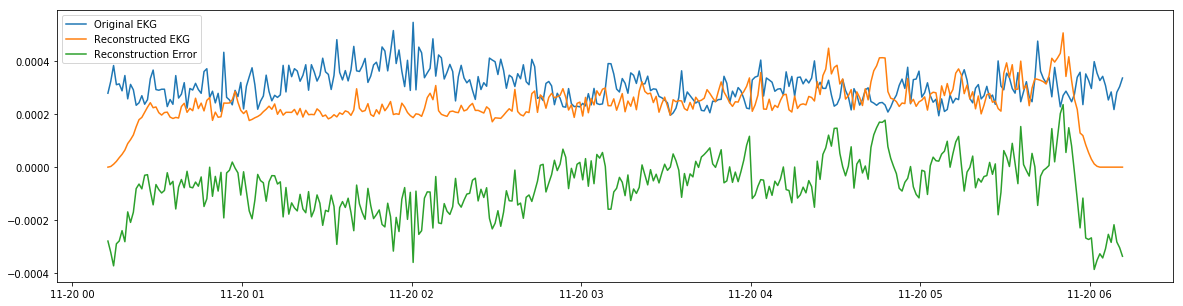

In [318]:
recontruction = reconstruct(df_anomalous, window, clusterer)
    
error = reconstruction[0:n_plot_samples] - df_anomalous[0:n_plot_samples]
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %f" % error.max())
print("98th percentile of reconstruction error was %f" % error_98th_percentile)
plt.figure(figsize=(20, 5))
plt.plot(df_nov20_1m["Timestamp"][0:360],df_anomalous[0:n_plot_samples], label="Original EKG")
plt.plot(df_nov20_1m["Timestamp"][0:360],reconstruction[0:n_plot_samples], label="Reconstructed EKG")
plt.plot(df_nov20_1m["Timestamp"][0:360],error[0:n_plot_samples], label="Reconstruction Error")
plt.legend()
plt.show()

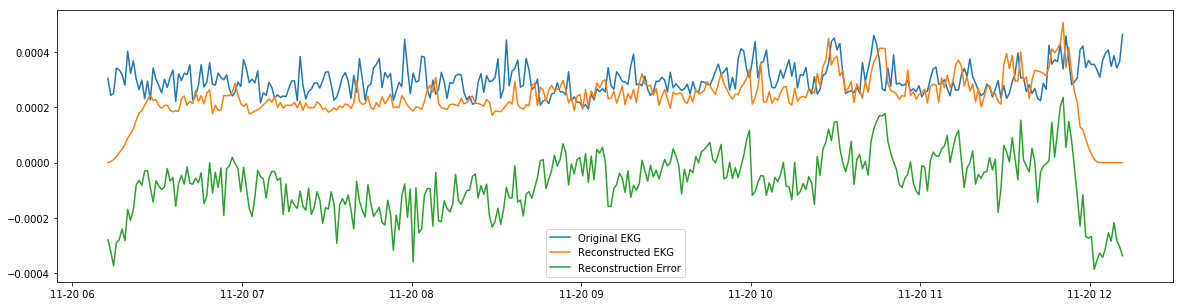

In [323]:
plt.figure(figsize=(20, 5))
plt.plot(df_nov20_1m["Timestamp"][360:720],df_anomalous[360:720], label="Original EKG")
plt.plot(df_nov20_1m["Timestamp"][360:720],reconstruction[0:n_plot_samples], label="Reconstructed EKG")
plt.plot(df_nov20_1m["Timestamp"][360:720],error[0:n_plot_samples], label="Reconstruction Error")
plt.legend()
plt.show()

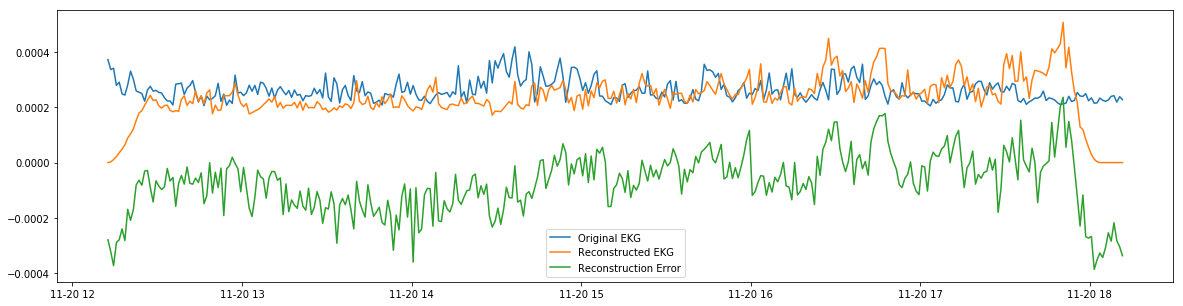

In [325]:
plt.figure(figsize=(20, 5))
plt.plot(df_nov20_1m["Timestamp"][720:1080],df_anomalous[720:1080], label="Original EKG")
plt.plot(df_nov20_1m["Timestamp"][720:1080],reconstruction[0:n_plot_samples], label="Reconstructed EKG")
plt.plot(df_nov20_1m["Timestamp"][720:1080],error[0:n_plot_samples], label="Reconstruction Error")
plt.legend()
plt.show()